In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<Figure size 144x144 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


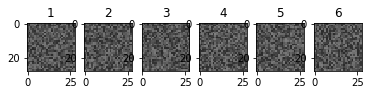

0 36.33600474515053


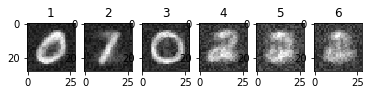

0 11.532947778701782 18.291617300578537


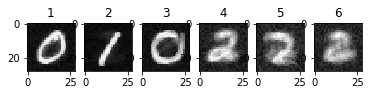

1 11.66592001914978 12.612402376005084


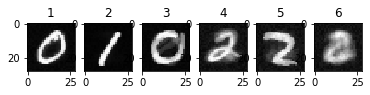

2 11.513243675231934 10.826568862928948


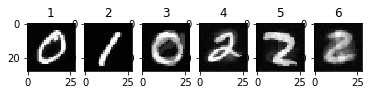

3 11.44838833808899 7.512832267592731


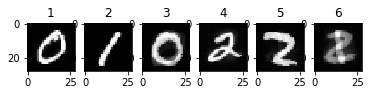

4 10.524148225784302 7.66398674719991


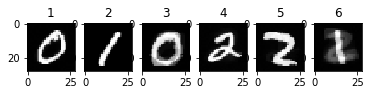

5 10.066093683242798 4.051722123966292


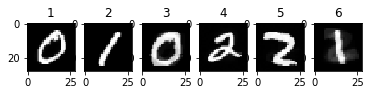

6 10.07944941520691 2.2996253570444


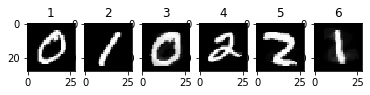

7 10.02754259109497 1.2303028740296225


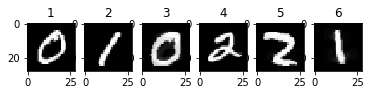

8 10.200262069702148 0.9239930869467003


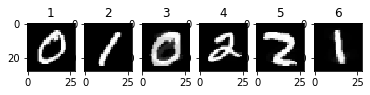

9 10.23985743522644 1.2765870276129765


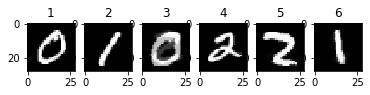

10 10.25778603553772 4.214550681087778


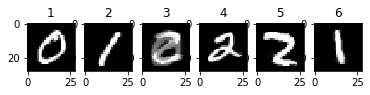

11 10.256844997406006 2.6837318997067934


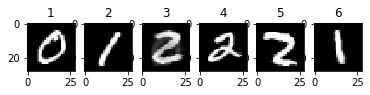

12 10.318385601043701 1.8931290147805897


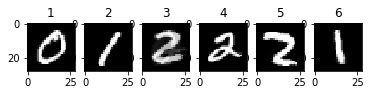

13 10.282578229904175 2.0400339421323808


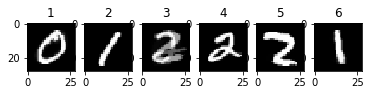

14 9.819530487060547 2.6890008841317847


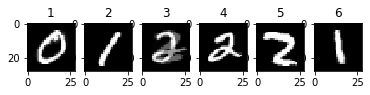

15 9.93364429473877 2.0952618316964218


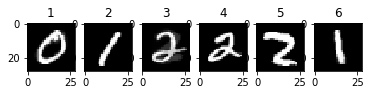

16 9.982545137405396 1.3839548153610604


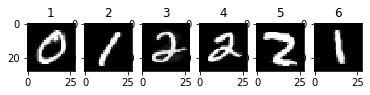

17 9.807639122009277 0.9193889943474305


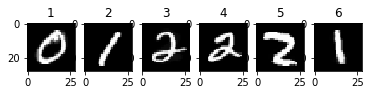

18 9.993737936019897 0.5492754230325473


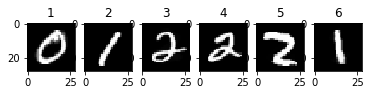

19 9.87022876739502 0.31066867794648745


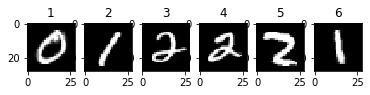

20 10.170870780944824 0.17122331453308537


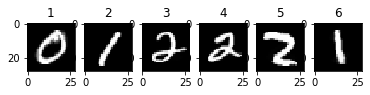

21 10.089133262634277 0.09287776276558989


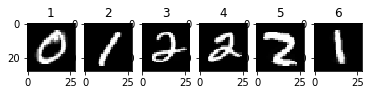

22 10.041443109512329 0.050246814569353856


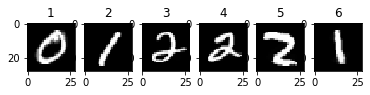

23 10.277616739273071 0.026752147079825345


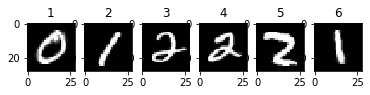

24 10.228551149368286 0.014360985945006838


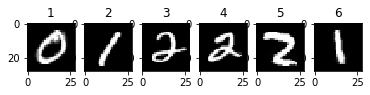

25 10.109050750732422 0.00777275579389403


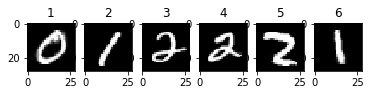

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams
from numpy.random import randint, rand
fig = plt.figure(figsize=(2,2))
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
df=pd.read_csv('/content/drive/My Drive/mnist_em.csv',encoding="SHIFT-JIS",header=0)
df=df[0:1000]
df/=255
M=6
sigma=0.5
T=np.size(df)/784
T=int(T)
size=np.size(df[0:0+1].to_numpy())
# T=100
def x(t):
    return np.array(df[t:t+1])[0]

mu = (rand(28*28*M)*0.5+0.25).reshape(M, 28*28)
for k in range(M):
        mu[k] /= mu[k].sum()
for k in range(M):
        mu[k] *= 255
# mu=[df[0:0+1].to_numpy()/255,df[1:1+1].to_numpy()/255,df[2:2+1].to_numpy()/255]
# mu=[[[0.25*(0+1)] * int(T)],[[0.25*(1+1)] * int(T)],[[0.25*(2+1)] * int(T)]]
# def mu(i):
#     # return df[i:i+1].to_numpy()/255
#     return [0.25*(i+1)] * T

def norm(x,y):
    sum=0
    z=x-y
    # for i in range(size):
        # sum+=z[i]**2
    return np.linalg.norm(x-y)
    # return sum**0.5

def exp(t,i):
    # sum=0
    # for index in range(np.size(df[0:1].to_numpy())):
    #     sum+=(x(t)[0,index]-mu[i][0,index])**2
    return math.exp(-np.linalg.norm(x(t)-mu[i])/(2*sigma**2))
    # return math.exp(-norm(x(t),mu[i])/(2*sigma**2))

def Sigma(M,t):
    sum=0
    for k in range(M):
        sum+=exp(t,k)
    return sum

def P(t,i):
    sum=0.0
    for k in range(M):
        sum+=exp(t,k)
    return math.exp(-np.linalg.norm(x(t)-mu[i])/(2*sigma**2))/sum

def numerator(i):
    sum=0
    for t in range(T):
        sum+=P(t,i)
    return sum/T


def denominator(i):
    sum=0
    for t in range(T):
        sum+=x(t)*P(t,i)
    return sum/T

def prime(i):
    sum1=0.0
    sum2=0.0
    for t in range(T):
        sum1+=P(t,i)
        mu[i]+=x(t)*P(t,i)
        # print(i,t,sum1)
    ans=mu[i]/sum1
    # maxi=max(ans)
    return mu[i]/sum1/max(ans)

import copy
def image(x):
    l=len(x)
    fig = plt.figure(figsize=(6,18))
    for i in range(1,l+1):
        plt.subplot(1,l,i)
        img = copy.deepcopy(np.array(x[i-1]).reshape(28,28))
        # img*=255
        plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 1, interpolation = 'none')
        plt.title("{}".format(i))
    plt.show()

image_history=[]
mu = (rand(28*28*M)*0.5+0.25).reshape(M, 28*28)*255
for k in range(M):
        mu[k] /= mu[k].sum()
for k in range(M):
        mu[k] *= 255
        image_history.append(copy.deepcopy(mu[k]))
# print(max(mu[0]))
image(mu)
# mu0_prime=prime(0)
# mu1_prime=prime(1)
# mu2_prime=prime(2)



# eval=norm(mu0_prime,mu[0])+norm(mu1_prime,mu[1])+norm(mu2_prime,mu[2])
mu_prime=copy.deepcopy(mu)
eval=0
for i in range(len(mu)):
        image_history.append(prime(i))
        mu[i]=prime(i)
        eval+=norm(mu[i],mu_prime[i])
# mu=[prime(0),prime(1),prime(2)]
times=0
# print(time,eval)
print(times,eval)
# 画像の表示
image(mu)

import time
judge=(times>30)and(eval>0.1)
for times in range(30):
        start = time.time()
        mu_prime=copy.deepcopy(mu)
        eval=0
        for i in range(len(mu)):
            image_history.append(prime(i))
            mu[i]=prime(i)
            eval+=np.linalg.norm(mu[i]-mu_prime[i])
        elapsed_time = time.time() - start
        print(times,elapsed_time,eval)
        image(mu)
        if eval<1e-2:
            break


In [10]:
P(0,0)

0.7260866281001958

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rcParams
fig = plt.figure(figsize=(2,2))
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
df=pd.read_csv('/content/drive/My Drive/mnist_em.csv',encoding="SHIFT-JIS",header=0)


<Figure size 144x144 with 0 Axes>

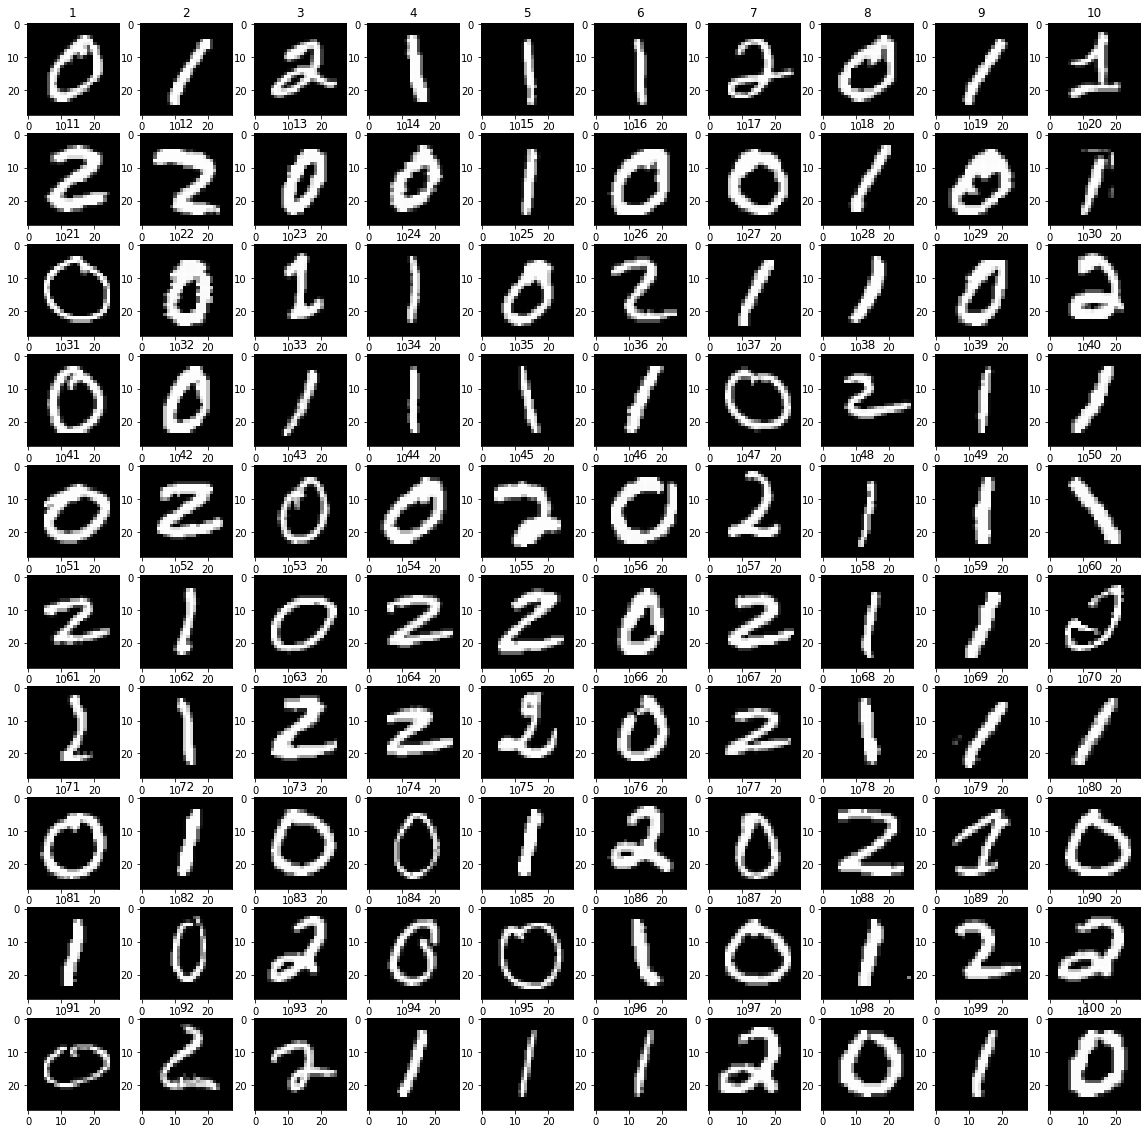

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    img=df[i:i+1].to_numpy().reshape(28,28)
    plt.imshow(df[i:i+1].to_numpy().reshape(28,28), cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
    plt.title("{}".format(i+1))
plt.show()
# fig.savefig("data.png")
# a=df[:1].to_numpy().reshape(28,28)
# #画像の表示
# plt.imshow(df[:1].to_numpy().reshape(28,28), cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
# plt.show()

In [ ]:
M=3
sigma=1
T=np.size(df)/784
T=int(T)
size=np.size(df[0:0+1].to_numpy())
# T=100
def x(t):
    return df[t:t+1].to_numpy()/255

mu=[df[0:0+1].to_numpy()/255,df[1:1+1].to_numpy()/255,df[2:2+1].to_numpy()/255]
# mu=[[[0.25*(0+1)] * int(T)],[[0.25*(1+1)] * int(T)],[[0.25*(2+1)] * int(T)]]
# def mu(i):
#     # return df[i:i+1].to_numpy()/255
#     return [0.25*(i+1)] * T

def norm(x,y):
    sum=0
    z=x-y
    for i in range(size):
        sum+=z[0,i]**2
    return sum**0.5

def exp(t,i):
    # sum=0
    # for index in range(np.size(df[0:1].to_numpy())):
    #     sum+=(x(t)[0,index]-mu[i][0,index])**2
    return math.exp(-norm(x(t),mu[i])/(2*sigma**2))

def Sigma(M,t):
    sum=0
    for i in range(M):
        sum+=exp(t,i)
    return sum

def P(t,i):
    return exp(t,i)/Sigma(M,t)

def numerator(i):
    sum=0
    for t in range(T):
        sum+=P(t,i)
    return sum/T


def denominator(i):
    sum=0
    for t in range(T):
        sum+=x(t)*P(t,i)
    return sum/T

def prime(i):
    sum1=0.0
    sum2=0.0
    for t in range(T):
        sum1+=P(t,i)
        sum2+=x(t)*P(t,i)
    return sum2/sum1


In [ ]:
T

1000

In [ ]:
mu[2][0,T]

IndexError: ignored

In [ ]:
numerator(0)

In [ ]:

mu0_prime=denominator(0)/numerator(0)
mu1_prime=denominator(1)/numerator(1)
mu2_prime=denominator(2)/numerator(2)
# mu=[mu(0),mu(1),mu(2)]
# print(mu[0])
# for i in range(M):
#     mu[i]=denominator(i)/numerator(i)

In [ ]:
print(mu0_prime)

In [ ]:
print(norm(mu0_prime,mu[0])+norm(mu1_prime,mu[1])+norm(mu2_prime,mu[2]))


In [ ]:
mu=[mu0_prime,mu1_prime,mu2_prime]
print(mu[0][0,1])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


0 22.10988668309709


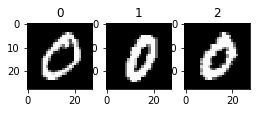

1 22.10988668309709


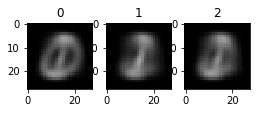

2 1.0177996611369986


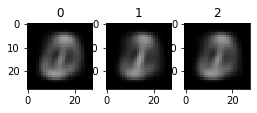

3 0.3265765746045317


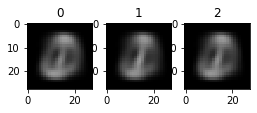

4 0.18104322843646609


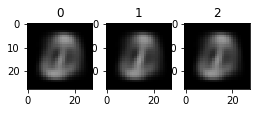

5 0.12933090654179924


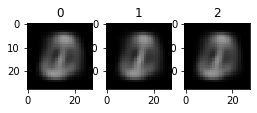

6 0.10014051155667616


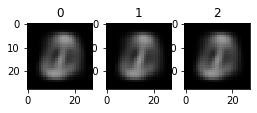

7 0.07934135543346031


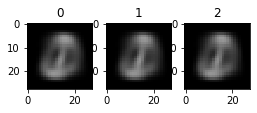

8 0.06334362820317346


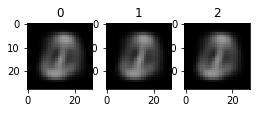

9 0.050736218767506065


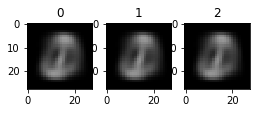

10 0.04070949104228662


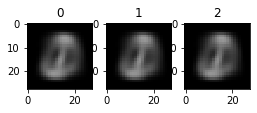

11 0.03270051294630493


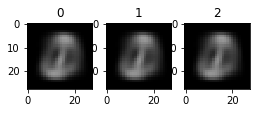

12 0.026287213154539277


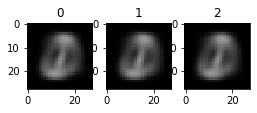

13 0.021143309585198132


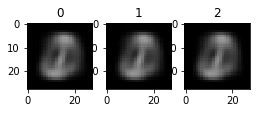

14 0.017012871225961266


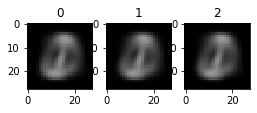

15 0.013693504617787278


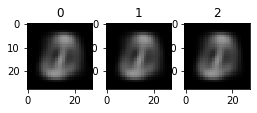

16 0.011024328063304955


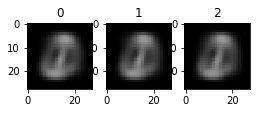

17 0.008877008705621893


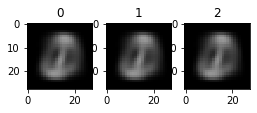

18 0.007148922252891743


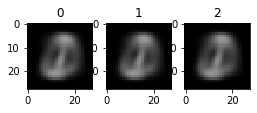

19 0.00575785372609904


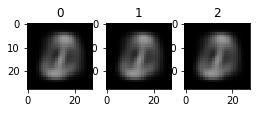

20 0.004637849914829058


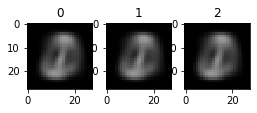

21 0.003735949534197948


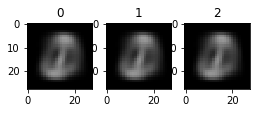

22 0.003009591604353391


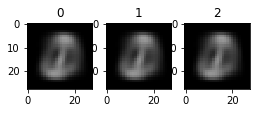

23 0.0024245532711235423


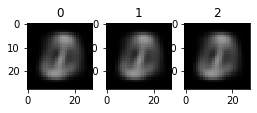

24 0.001953304071192163


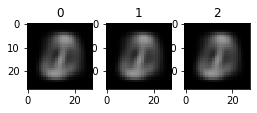

25 0.0015736896361568584


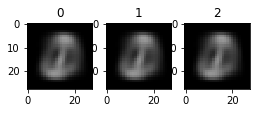

26 0.0012678771286612162


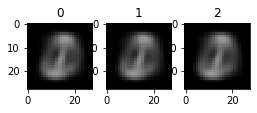

27 0.0010215092947278496


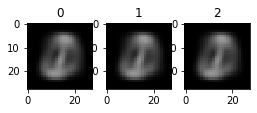

28 0.0008230252050717568


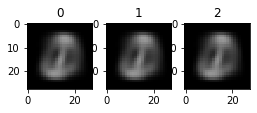

29 0.0006631144341164776


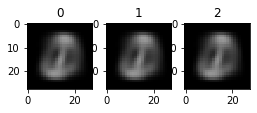

30 0.0005342782098827091


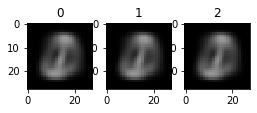

31 0.0004304764135444964


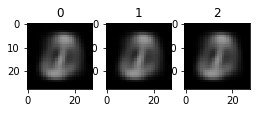

32 0.0003468435344209567


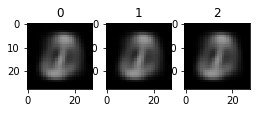

33 0.00027946004790616817


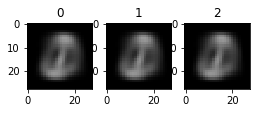

34 0.00022516836273332939


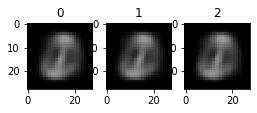

35 0.00018142462298687668


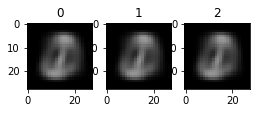

36 0.0001461793643247865


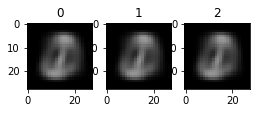

37 0.00011778139614723759


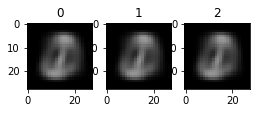

38 9.490038237319305e-05


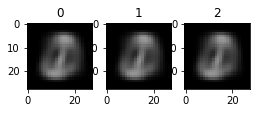

39 7.646447970909502e-05


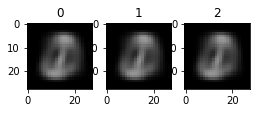

40 6.161010171199255e-05


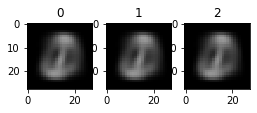

41 4.964144848249869e-05


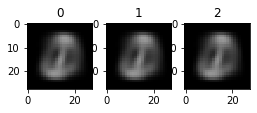

42 3.9997903819760635e-05


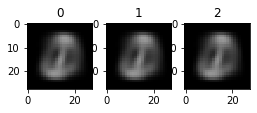

43 3.22277684157408e-05


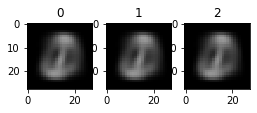

44 2.5967097510168702e-05


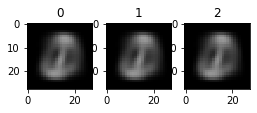

45 2.092265163846421e-05


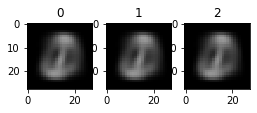

46 1.6858159278728387e-05


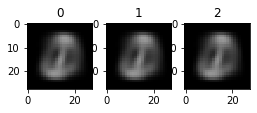

47 1.358324925333576e-05


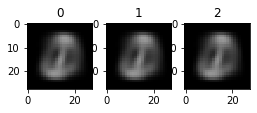

48 1.09445336628512e-05


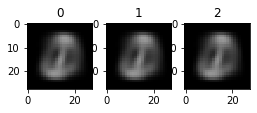

49 8.818422666597242e-06


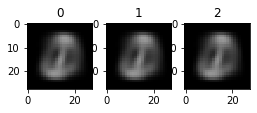

50 7.105335788347661e-06


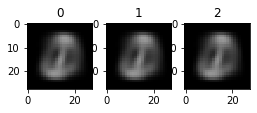

51 5.7250376144913135e-06


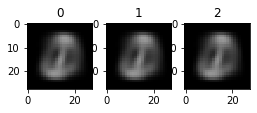

52 4.612879537125248e-06


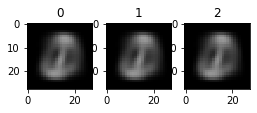

53 3.716771855705359e-06


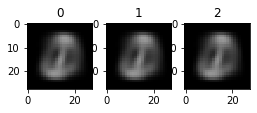

54 2.9947440984976204e-06


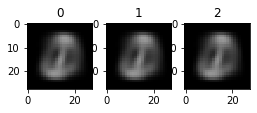

55 2.4129789775756807e-06


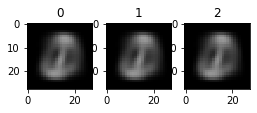

56 1.944228855996576e-06


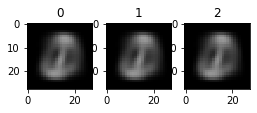

57 1.5665390983853215e-06


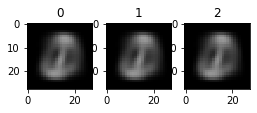

58 1.2622201204157323e-06


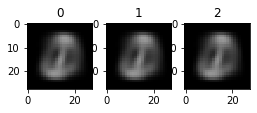

59 1.0170187200351147e-06


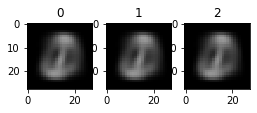

60 8.194507648446502e-07


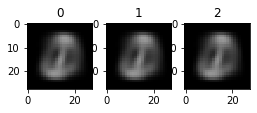

61 6.602626061589137e-07


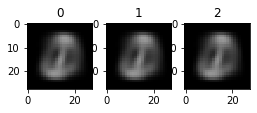

62 5.319986911509758e-07


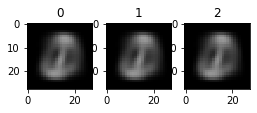

63 4.286516413071601e-07


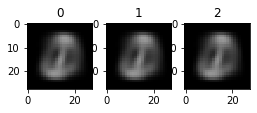

64 3.453809350146941e-07


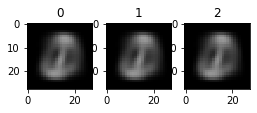

65 2.782865528260395e-07


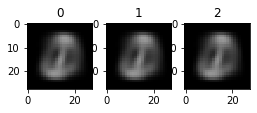

66 2.242260862382009e-07


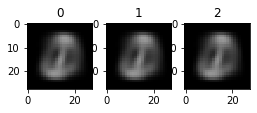

67 1.8066744192461566e-07


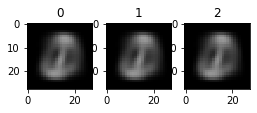

68 1.455706661210761e-07


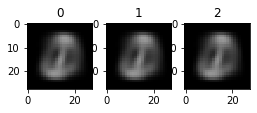

69 1.1729183461788991e-07


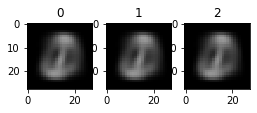

70 9.450648618043638e-08


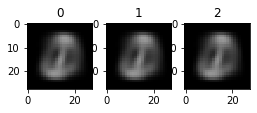

71 7.614749004540802e-08


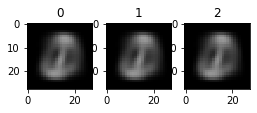

72 6.135494887056076e-08


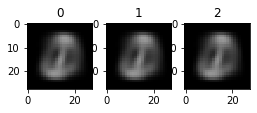

73 4.9436009725813956e-08


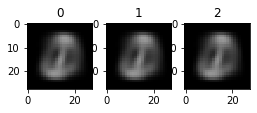

74 3.983246195389759e-08


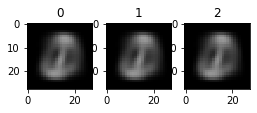

75 3.209454951361113e-08


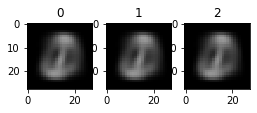

76 2.5859776862424948e-08


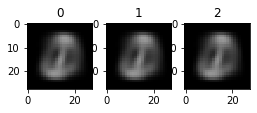

77 2.0836232104600615e-08


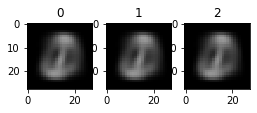

78 1.6788581426535512e-08


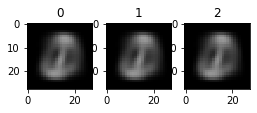

79 1.3527155847869317e-08


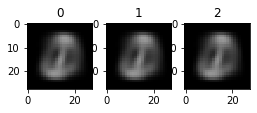

80 1.089933208182589e-08


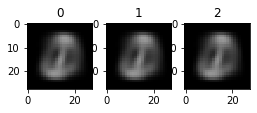

81 8.782030973363235e-09


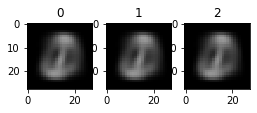

82 7.076005520273621e-09


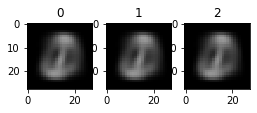

83 5.701410881966407e-09


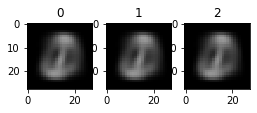

84 4.593869874453024e-09


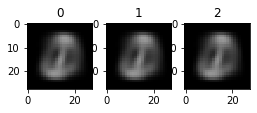

85 3.701442403373968e-09


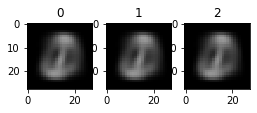

86 2.9823782930104666e-09


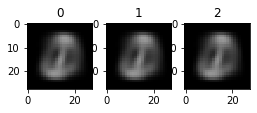

87 2.403020308588777e-09


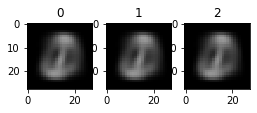

88 1.9361719911138396e-09


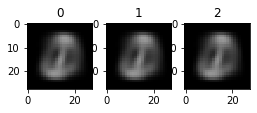

89 1.5600933139318655e-09


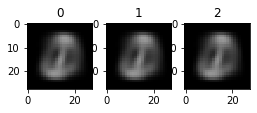

90 1.2569933552808392e-09


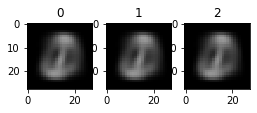

91 1.0128292858661935e-09


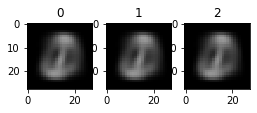

92 8.160681982008438e-10


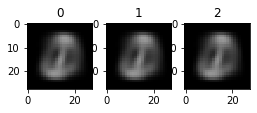

93 6.575256019604441e-10


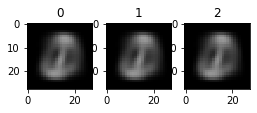

94 5.298144942795093e-10


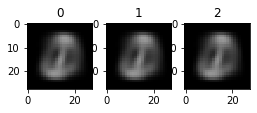

95 4.2682413555956803e-10


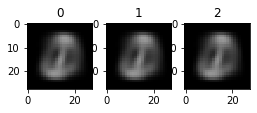

96 3.43935897136442e-10


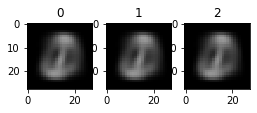

97 2.771410942178984e-10


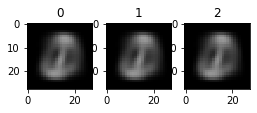

98 2.2328740757634982e-10


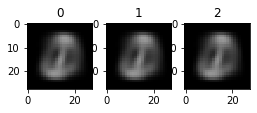

In [ ]:
mu=[df[0:0+1].to_numpy()/255,df[12:12+1].to_numpy()/255,df[13:13+1].to_numpy()/255]
# mu=[[[0.25*(0+1)] * int(size)],[[0.25*(1+1)] * int(size)],[[0.25*(2+1)] * int(size)]]
mu0_prime=prime(0)
mu1_prime=prime(1)
mu2_prime=prime(2)
eval=norm(mu0_prime,mu[0])+norm(mu1_prime,mu[1])+norm(mu2_prime,mu[2])
time=0
print(time,eval)
# 画像の表示
fig = plt.figure(figsize=(4,12))
plt.subplot(1,3,1)
img=np.array(mu[0][0]).reshape(28,28)*255
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
plt.title("0")
plt.subplot(1,3,2)
img2=np.array(mu[1][0]).reshape(28,28)*255
plt.imshow(img2, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
plt.title("1")
plt.subplot(1,3,3)
img3=np.array(mu[2][0]).reshape(28,28)*255
plt.imshow(img3, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
plt.title("2")
plt.show()
while(eval>1e-10):
    time+=1
    mu0_prime=prime(0)
    mu1_prime=prime(1)
    mu2_prime=prime(2)
    eval=norm(mu0_prime,mu[0])+norm(mu1_prime,mu[1])+norm(mu2_prime,mu[2])
    print(time,eval)
    mu=[mu0_prime,mu1_prime,mu2_prime]

    # 画像の表示
    fig = plt.figure(figsize=(4,12))
    plt.subplot(1,3,1)
    img=np.array(mu[0][0]).reshape(28,28)*255
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
    plt.title("0")
    plt.subplot(1,3,2)
    img2=np.array(mu[1][0]).reshape(28,28)*255
    plt.imshow(img2, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
    plt.title("1")
    plt.subplot(1,3,3)
    img3=np.array(mu[2][0]).reshape(28,28)*255
    plt.imshow(img3, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
    plt.title("2")
    plt.show()

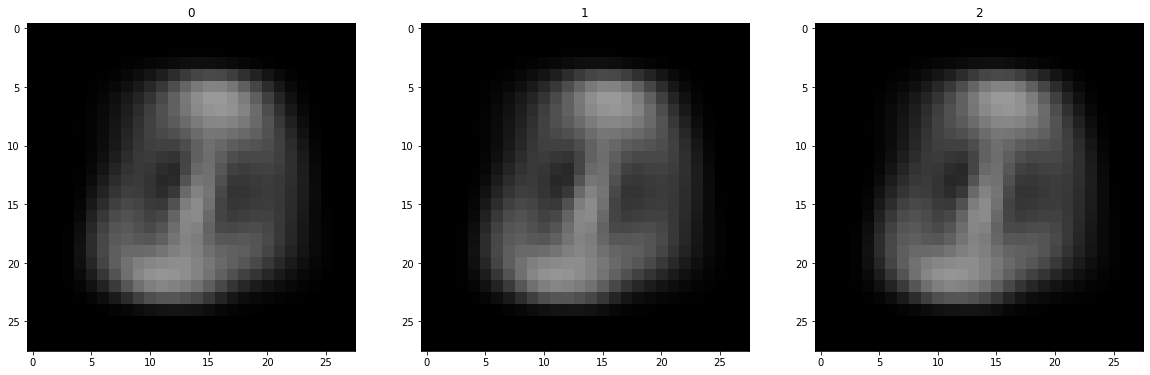

In [6]:
fig = plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
img=mu0_prime.reshape(28,28)*255
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
plt.title("0")
plt.subplot(1,3,2)
img2=mu1_prime.reshape(28,28)*255
plt.imshow(img2, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
plt.title("1")
plt.subplot(1,3,3)
img3=mu2_prime.reshape(28,28)*255
plt.imshow(img3, cmap = 'gray', vmin = 0, vmax = 255, interpolation = 'none')
plt.title("2")
plt.show()

In [ ]:
print(1e-6)

In [ ]:
mu2_prime*255

In [12]:
import time

if __name__ == '__main__':
  a=0
  start = time.time()
  for i in range(0,10000):
    for j in range(1000):
      a+=1
  elapsed_time = time.time() - start
  print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:0.9229199886322021[sec]
